## Recognizing images

In this notebook we will go through the application of our recognizer into some images in order to get the recognition probabilities

### Importing libraries

In [1]:
import sys
import os
sys.path.append('/opt/workspace/src/python_scripts/')
from ops_face_recognition import predict_probabilities, train_recognizer
from ops_face_detection import get_embeddings_from_image, get_actors_embeddings
path_arr = os.getcwd().split(os.path.sep)
os.chdir(os.path.sep.join(path_arr[:path_arr.index('src')+1]))

Installing packages...
Packages installed.
Installing packages...
Packages installed.


### Getting probabilities for one image

We can get the predicitions by using the `predict_probabilities` function, and passing a specific recognizer

The model predicts that the photo is from 2037_cillian_murphy, with a 62.704897831269804% probability. 

The total predictions obtained by the model are:

['2037_cillian_murphy' '0.627048978312698']


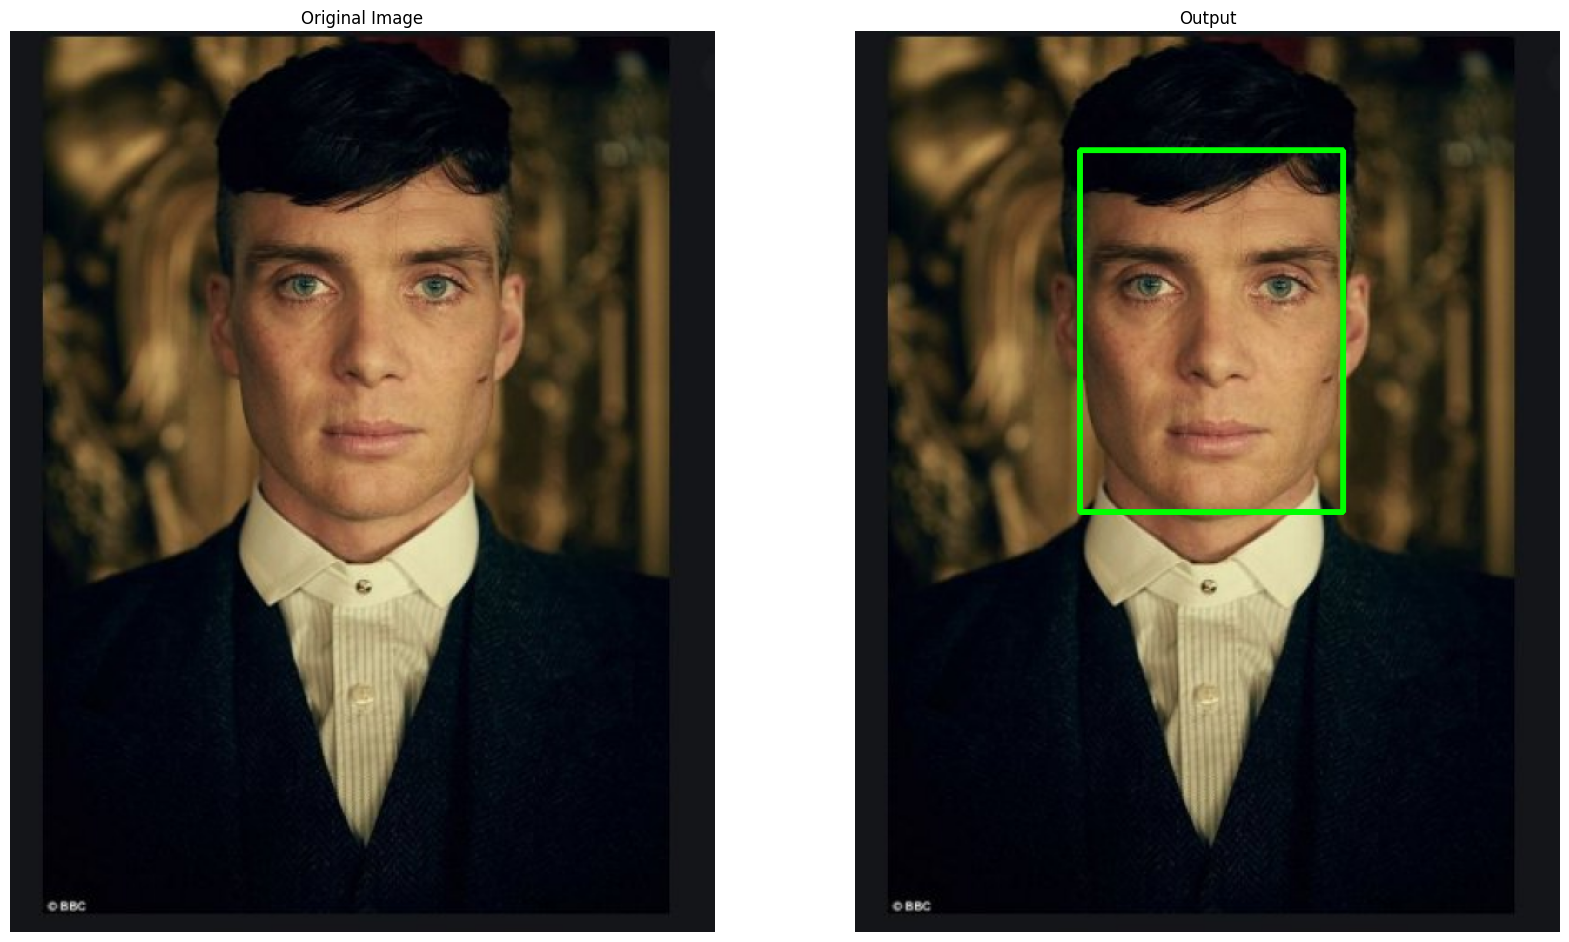

In [11]:
test_image_path = './datasets/actor_faces/2037_cillian_murphy/cillian_murphy_9.jpg'
test_embeddings, test_metadata = get_embeddings_from_image(
    test_image_path, 
    display = True
)

embeddings_folder = './models/embeddings/actor_faces'
recognizer_dict, recognizer_metadata = train_recognizer(
    embeddings_folder = embeddings_folder,
    model_id = None, #Grabs the latest model available
    C=1.0,
    kernel='linear',
    probability=True
)

predictions = predict_probabilities(
    target_embeddings = test_embeddings,
    recognizer = recognizer_dict,
    recognizer_metadata = recognizer_metadata,
    array_format = True #This will return a numpy array, otherwise a python dict
)

print(f'The model predicts that the photo is from {str(predictions[0][0][0])}, with a {float(predictions[0][0][1])*100}% probability. \n')
print(f'The total predictions obtained by the model are:\n')
print(predictions[0][0:2][0])

In [16]:
predictions[0][0][0]

'2037_cillian_murphy'

Or we can also pass a recognizer folder to use an already created recognizer

In [ ]:
test_image_path = './datasets/actor_faces/2037_cillian_murphy/cillian_murphy_9.jpg'
test_embeddings, test_metadata = get_embeddings_from_image(
    test_image_path, 
    display = True
)

recognizer_folder = './models/recognizers'
predictions = predict_probabilities(
    target_embeddings = test_embeddings,
    recognizer_folder = recognizer_folder,
    model_id = None, #Grab the latest one
    array_format = True #This will return a numpy array, otherwise a python dict
)

print(f'The model predicts that the photo is from {str(predictions[0][0][0])}, with a {float(predictions[0][0][1])*100}% probability. \n')
print(f'The total predictions obtained by the model are:\n')
print(predictions[0])